In [1]:
import os
import pandas as pd
from statistics import mean, stdev

def detect_anomalies_pandas(data_dir, threshold=2.0):
    
    anomalies = {}
    all_test_data = []

    json_files = [f for f in os.listdir(data_dir) if f.endswith('.json')]
    for file in json_files:
        filepath = os.path.join(data_dir, file)
        df = pd.read_json(filepath)

        for suite in df['test_suites']:
            for test_case in suite['test_cases']:
                case_data = {
                    'name': test_case['name'],
                    'execution_time': test_case['execution_time']
                }
                all_test_data.append(case_data)

    # Restructure data by test name
    df = pd.DataFrame(all_test_data)
    grouped_data = {}
    for test_name, test_group in df.groupby('name'):
        grouped_data[test_name] = test_group['execution_time'].tolist()
            # Debugging 
    print("Grouped Test Data:")
    print(grouped_data)

    # Anomaly Detection per Test 
    for test_name, execution_times in grouped_data.items():
        avg_time = mean(execution_times)
        std_dev = stdev(execution_times)

        anomalies[test_name] = []  # Store indices of anomalies for each test
        for index, time in enumerate(execution_times):
            z_score = (time - avg_time) / std_dev
            if abs(z_score) > threshold:
                anomalies[test_name].append(index)

    return anomalies

DATA_DIR = '/Users/patrick/Desktop/appdev/project/data'
anomalies = detect_anomalies_pandas(DATA_DIR)
print(anomalies)

Grouped Test Data:
{'test_create_item_works': [0.062, 0.021, 0.062, 0.022, 0.062, 0.023], 'test_home_page_works': [0.025, 0.009000000000000001, 0.025, 0.009000000000000001, 0.025, 0.01], 'test_items_filter_by_owners': [1.416, 0.483, 1.416, 0.481, 1.416, 0.485], 'test_items_page_returns_active': [1.325, 0.46900000000000003, 1.325, 0.47300000000000003, 1.325, 0.481], 'test_user_signup_page_loads_correctly': [0.013000000000000001, 0.005, 0.013000000000000001, 0.005, 0.013000000000000001, 0.005], 'test_user_signup_page_submission_works': [1.605, 0.47100000000000003, 1.605, 0.47200000000000003, 1.605, 0.482], 'test_valid_signup_form_sends_email': [0.167, 0.015, 0.167, 0.016, 0.167, 0.016]}
{'test_create_item_works': [], 'test_home_page_works': [], 'test_items_filter_by_owners': [], 'test_items_page_returns_active': [], 'test_user_signup_page_loads_correctly': [], 'test_user_signup_page_submission_works': [], 'test_valid_signup_form_sends_email': []}


In [2]:
import os
import json

def display_build_health(data_dir):
    """
    Reads the JSON files in the given data directory and displays the overall build health,
    including the file with the longest build time.
    """
    build_data = []

    # Read the JSON files
    json_files = [f for f in os.listdir(data_dir) if f.endswith('.json')]
    for file in json_files:
        filepath = os.path.join(data_dir, file)
        with open(filepath, 'r') as f:
            data = json.load(f)
            build_data.append((file, data))

    # Find the file with the longest build time
    longest_build = max(build_data, key=lambda x: x[1]['total_time'])
    longest_build_file, longest_build_data = longest_build

    # Aggregate the build data
    total_time = sum(build[1]['total_time'] for build in build_data)
    total_tests = sum(build[1]['total_count'] for build in build_data)
    successful_tests = sum(build[1]['success_count'] for build in build_data)
    failed_tests = sum(build[1]['failed_count'] for build in build_data)
    skipped_tests = sum(build[1]['skipped_count'] for build in build_data)
    errors = sum(build[1]['error_count'] for build in build_data)

    # Calculate the pass rate
    if total_tests > 0:
        pass_rate = (successful_tests / total_tests) * 100
    else:
        pass_rate = 0

    # Display the build health
    print(f"Total time: {total_time:.2f} seconds")
    print(f"Total tests: {total_tests}")
    print(f"Successful tests: {successful_tests} ({pass_rate:.2f}%)")
    print(f"Failed tests: {failed_tests}")
    print(f"Skipped tests: {skipped_tests}")
    print(f"Errors: {errors}")
    print()
    print(f"File with the longest build time: {longest_build_file}")
    print(f"Build time: {longest_build_data['total_time']:.2f} seconds")
    
DATA_DIR = '/Users/patrick/Desktop/appdev/project/data'
display_build_health(DATA_DIR)

Total time: 18.29 seconds
Total tests: 42
Successful tests: 42 (100.00%)
Failed tests: 0
Skipped tests: 0
Errors: 0

File with the longest build time: build_data_3.json
Build time: 6.12 seconds


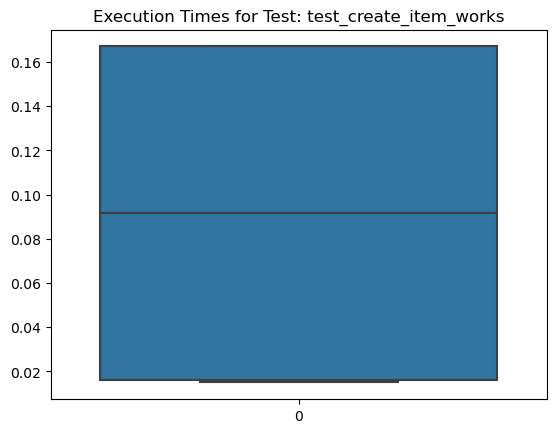

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


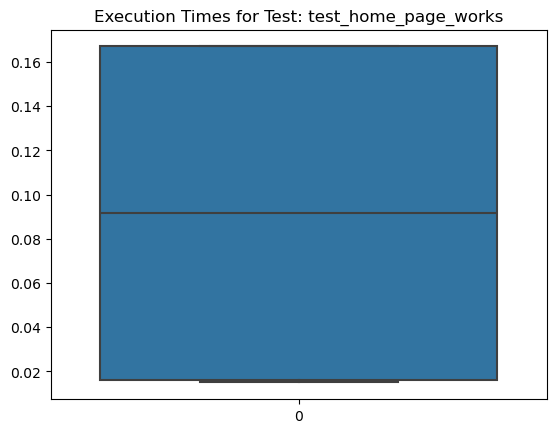

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


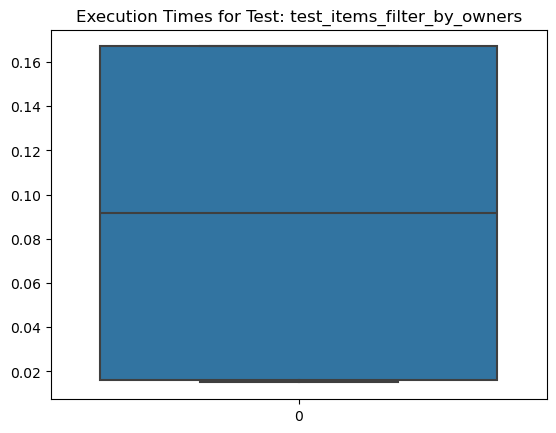

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


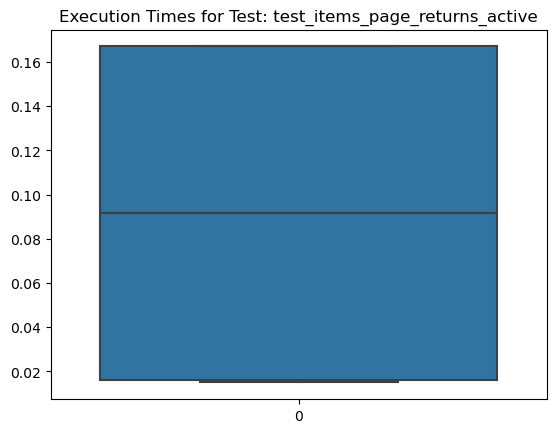

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


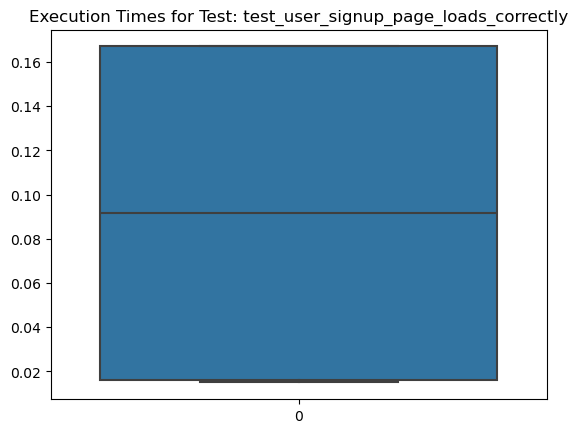

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


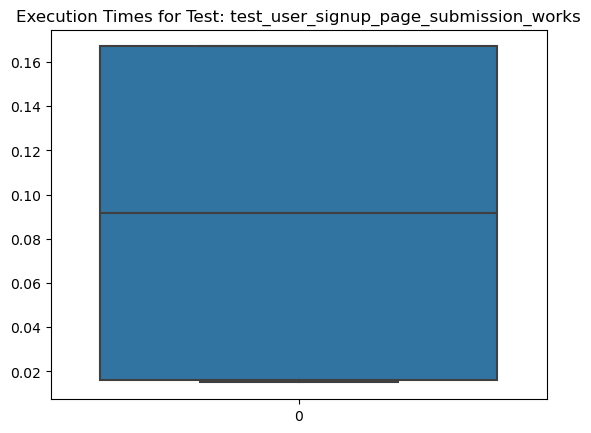

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


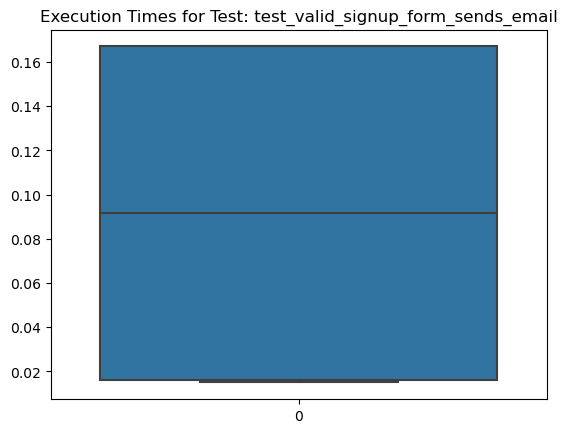

Grouped Test Data:
{'test_create_item_works': [0.062, 0.021, 0.062, 0.022, 0.062, 0.023], 'test_home_page_works': [0.025, 0.009000000000000001, 0.025, 0.009000000000000001, 0.025, 0.01], 'test_items_filter_by_owners': [1.416, 0.483, 1.416, 0.481, 1.416, 0.485], 'test_items_page_returns_active': [1.325, 0.46900000000000003, 1.325, 0.47300000000000003, 1.325, 0.481], 'test_user_signup_page_loads_correctly': [0.013000000000000001, 0.005, 0.013000000000000001, 0.005, 0.013000000000000001, 0.005], 'test_user_signup_page_submission_works': [1.605, 0.47100000000000003, 1.605, 0.47200000000000003, 1.605, 0.482], 'test_valid_signup_form_sends_email': [0.167, 0.015, 0.167, 0.016, 0.167, 0.016]}
{'test_create_item_works': [], 'test_home_page_works': [], 'test_items_filter_by_owners': [], 'test_items_page_returns_active': [], 'test_user_signup_page_loads_correctly': [], 'test_user_signup_page_submission_works': [], 'test_valid_signup_form_sends_email': []}


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, stdev
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

def detect_anomalies_pandas(data_dir, threshold=2.0, p=0, d=1, q=2):
    
    anomalies = {}
    all_test_data = []

    json_files = [f for f in os.listdir(data_dir) if f.endswith('.json')]
    for file in json_files:
        filepath = os.path.join(data_dir, file)
        df = pd.read_json(filepath)

        for suite in df['test_suites']:
            for test_case in suite['test_cases']:
                case_data = {
                    'name': test_case['name'],
                    'execution_time': test_case['execution_time']
                }
                all_test_data.append(case_data)
    # Restructure data by test name
    df = pd.DataFrame(all_test_data)
    grouped_data = {}
    for test_name, test_group in df.groupby('name'):
        grouped_data[test_name] = test_group['execution_time'].tolist()
    for test_name, execution_times in grouped_data.items():
        execution_times = test_group['execution_time'].tolist() 
        plt.figure()  # Create a figure for each test case
        sns.boxplot(data=execution_times)
        plt.title(f"Execution Times for Test: {test_name}")
        plt.show() 
        # ARIMA Modeling 
        model = ARIMA(execution_times, order=(p, d, q))  
        model_fit = model.fit() 
        forecast = model_fit.predict(len(execution_times), len(execution_times) + 3)

            # Debugging 
    print("Grouped Test Data:")
    print(grouped_data)

    # Anomaly Detection per Test 
    for test_name, execution_times in grouped_data.items():
        avg_time = mean(execution_times)
        std_dev = stdev(execution_times)

        anomalies[test_name] = []  # Store indices of anomalies for each test
        for index, time in enumerate(execution_times):
            z_score = (time - avg_time) / std_dev
            if abs(z_score) > threshold:
                anomalies[test_name].append(index)

    return anomalies

DATA_DIR = '/Users/patrick/Desktop/appdev/project/data'
anomalies = detect_anomalies_pandas(DATA_DIR)
print(anomalies)